<a href="https://colab.research.google.com/github/michal-dom/praca_magisterska/blob/master/disaster_tweets/DTC-Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disaster tweets clasification - EDA/Stats


In [1]:
from google.colab import drive
drive.mount('/content/drive')

from os import listdir
from os.path import isfile, join
files = [f for f in listdir('/content/drive/My Drive/Studia/magisterka/disaster tweets')]
print(files)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
['test.csv', 'train.csv', 'clean_train.csv', 'clea_test.csv']


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
plt.style.use('ggplot')

In [3]:
from nltk import download
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

download('stopwords')
download('punkt')
stop=set(stopwords.words('english'))
import re

import gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
train= pd.read_csv('/content/drive/My Drive/Studia/magisterka/disaster tweets/clean_train.csv', sep='\t')
test=pd.read_csv('/content/drive/My Drive/Studia/magisterka/disaster tweets/clea_test.csv', sep='\t')

train.head(5)

,Unnamed: 0,id,keyword,location,text,target,clean_text,clean_text_without_stops
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,residents asked place notified officers evacua...
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders cal...
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...


#Classes distribution

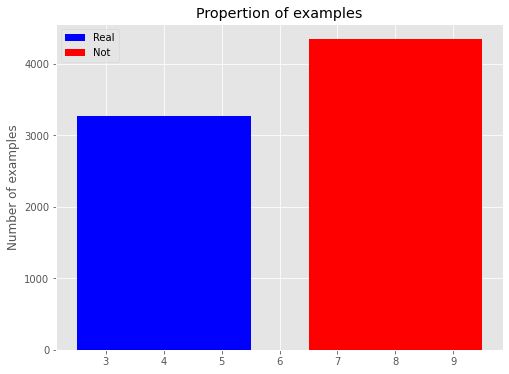

In [5]:
Real_len = train[train['target'] == 1].shape[0]
Not_len = train[train['target'] == 0].shape[0]


# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (8, 6)
plt.bar(4,Real_len,3, label="Real", color='blue')
plt.bar(8,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

#Number of characters in classes

In [12]:
train['length'] = train['text'].apply(len)
train['clean_length'] = train['clean_text'].apply(len)
train['clean_text_without_stops'] = train['clean_text_without_stops'].astype(str)
train['clean_length_without_stops'] = train['clean_text_without_stops'].apply(len)
train.head()

,Unnamed: 0,id,keyword,location,text,target,clean_text,clean_text_without_stops,length,clean_length,clean_length_without_stops
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us,69,68,44
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,38,37,37
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,residents asked place notified officers evacua...,133,132,80
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders cal...,65,63,53
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...,88,86,55


###Number of characters before cleaning

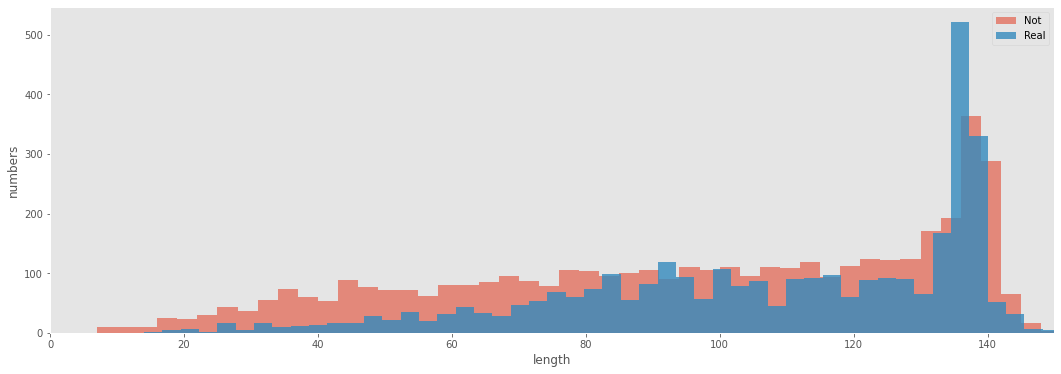

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 50
plt.hist(train[train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

###Number of characters after cleaning and before removing stopwords

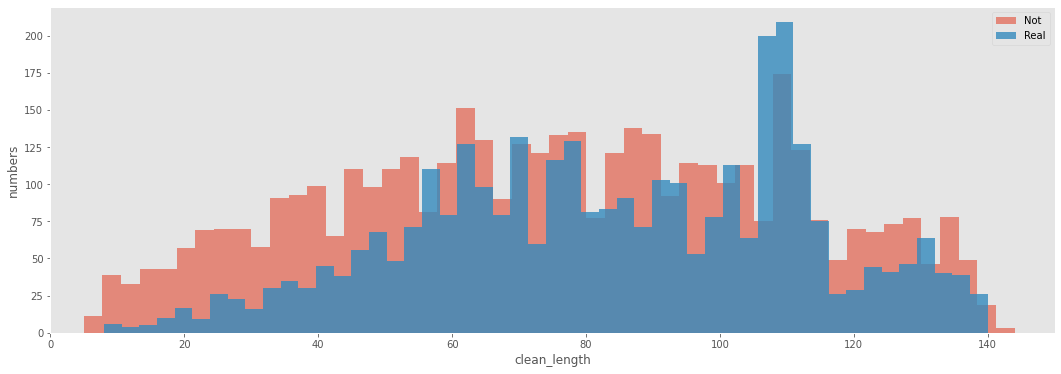

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 50
plt.hist(train[train['target'] == 0]['clean_length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['clean_length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('clean_length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

###Number of characters after removing stopwords

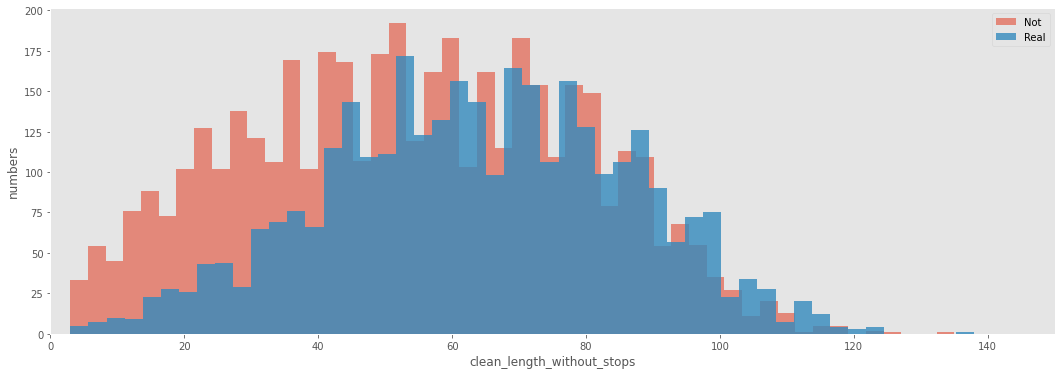

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 50
plt.hist(train[train['target'] == 0]['clean_length_without_stops'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['clean_length_without_stops'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('clean_length_without_stops')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

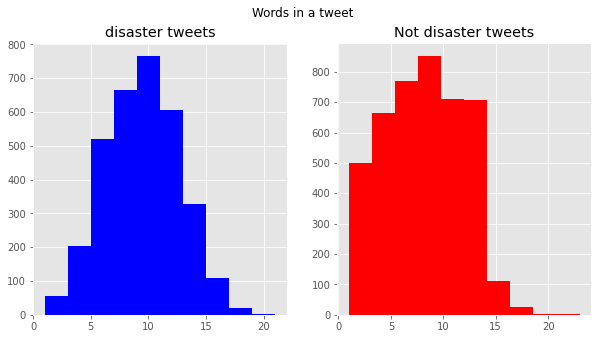

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 50
plt.hist(train[train['target'] == 0]['clean_length_without_stops'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train[train['target'] == 1]['clean_length_without_stops'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('clean_length_without_stops')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['clean_text_without_stops'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['clean_text_without_stops'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

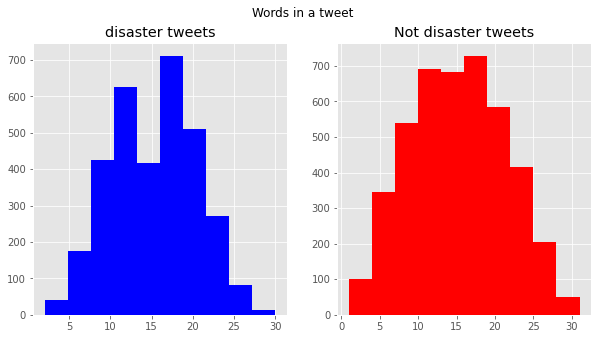

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

In [0]:
words_dict_0 = {}
words_dict_1 = {}
words_dict_all = {}


for text in train[train['target']==0]['clean_text_without_stops']:
  for w in text.split(' '):
    if not w in words_dict_0:
      words_dict_0[w] = 1
    else:
      words_dict_0[w] += 1


for text in train[train['target']==1]['clean_text_without_stops']:
  for w in text.split(' '):
    if not w in words_dict_1:
      words_dict_1[w] = 1
    else:
      words_dict_1[w] += 1


for text in train['clean_text_without_stops']:
  for w in text.split(' '):
    if not w in words_dict_all:
      words_dict_all[w] = 1
    else:
      words_dict_all[w] += 1

<BarContainer object of 10 artists>

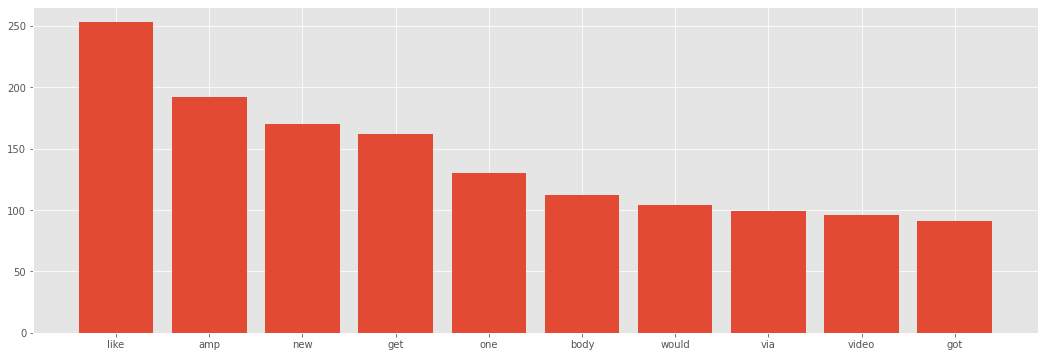

In [34]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
top = top=sorted(words_dict_0.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

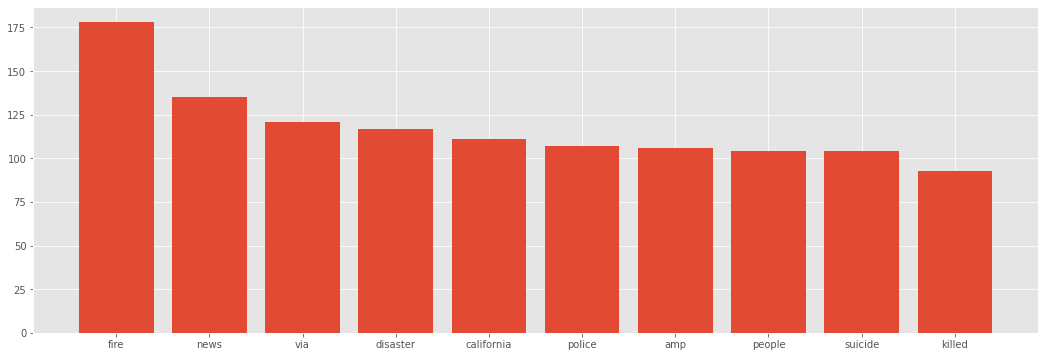

In [35]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
top = top=sorted(words_dict_1.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

#Bag of words

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = train["clean_text_without_stops"].tolist()
list_labels = train["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=7)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix



In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


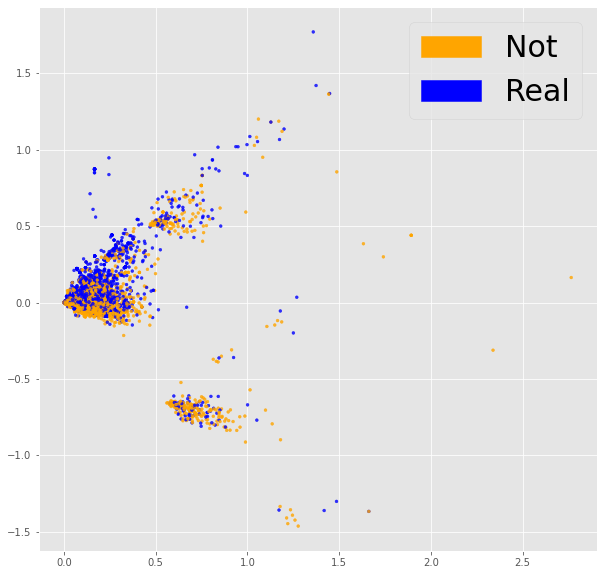

In [53]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

TDIF

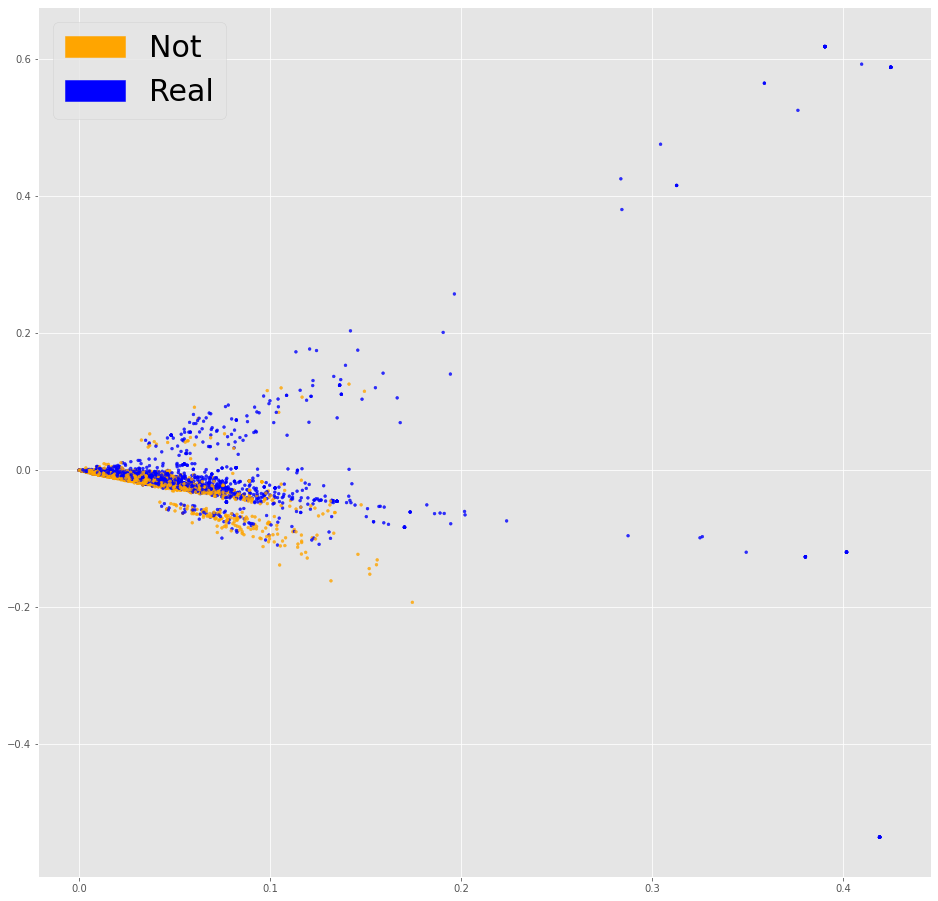

In [54]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()